In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

In [2]:
%load_ext rpy2.ipython

In [3]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='<U9')

In [4]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

X_test = np.linspace(0, 5, num=1000)[:,np.newaxis]

In [8]:
len(X)

40

In [5]:
df = pd.DataFrame({
    "x": X.ravel(),
    "y": y
})

df_test = pd.DataFrame({
    "x": X_test.ravel(),
})

In [9]:
for degree in range(50):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression())])
    yhat = model.fit(X, y).predict(X_test)
    df_test[str(degree)] = yhat

dfm = pd.melt(df_test, id_vars=["x"],
          var_name="degree",
          value_name="y")

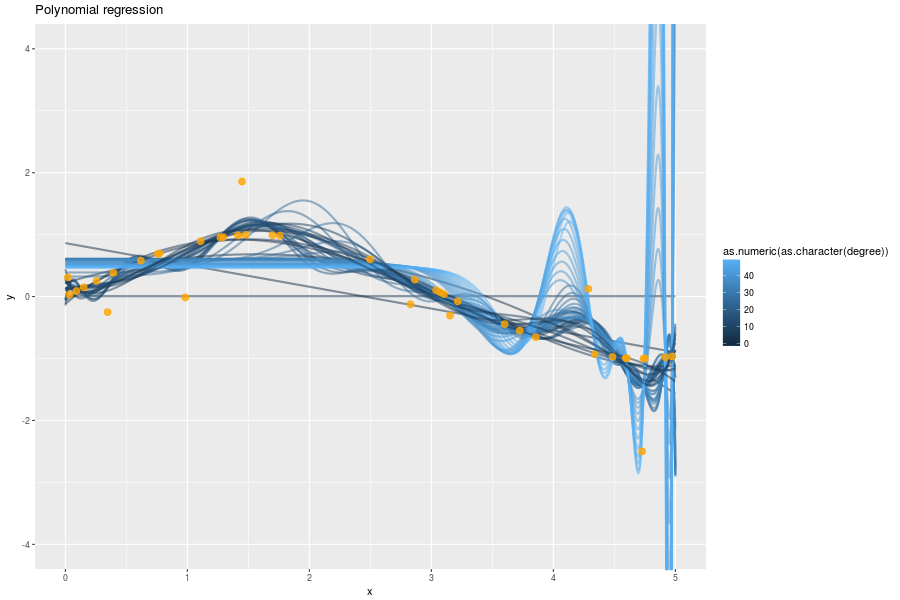

In [10]:
%%R -i df -i dfm -w 900 -h 600
ggplot(df, aes(x, y)) +
  geom_line(data = dfm, aes(color = as.numeric(as.character(degree)), group = degree), size = 1, alpha = 0.5) +
  geom_point(color = "orange", size = 3, alpha = 0.8) +
  labs(title = "Polynomial regression") +
  coord_cartesian(ylim=c(-4, 4))

In [28]:
pf = PolynomialFeatures(degree=40)

In [29]:
pf.fit_transform(X).shape

(40, 41)

In [19]:
X[:6,:]

array([[ 0.02109698],
       [ 0.03328156],
       [ 0.09065866],
       [ 0.14989691],
       [ 0.25546141],
       [ 0.34594792]])